# Machine Learning Intro ‚Äì Exercise Notebook

This notebook accompanies the *Start‚Äëup Seminar* (2025‚Äë06‚Äë04).  
Work through the problems to reinforce the ideas from the lecture:
1. End‚Äëto‚Äëend regression workflow with the California‚Äëhousing data
2. End‚Äëto‚Äëend classification workflow with the Breast‚ÄëCancer data
3. End‚Äëto‚Äëend clustering analysis with the Iris data (incl. PCA visualization)

You‚Äôll need ~2‚ÄØh if you code along diligently. Good luck!

## 0.¬†¬†Environment setup
Run the cell below to import common libraries. Feel free to add any others you need.

In [90]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.datasets import fetch_california_housing, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

set_config(transform_output='pandas')  # nicer display
np.random.seed(42)

## 1.¬†¬†Regression¬†‚Äì California¬†Housing
**Dataset**  

The California Housing dataset is a classic dataset from the 1990s used for regression tasks. It contains information on housing prices in California districts and is often used to predict median house value based on various features.

Key Characteristics:

- Target: Median house value (in $100,000s)

- Features (8 total):

    - `MedInc`: Median income in the district

    - `HouseAge`: Median house age

    - `AveRooms`: Average number of rooms per household

    - `AveBedrms`: Average number of bedrooms

    - `Population`: Total population

    - `AveOccup`: Average number of household members

    - `Latitude`: Latitude of the district

    - `Longitude`: Longitude of the district

**Hands-on Workout**  

We will build a model to predict **median house value**.
The section mirrors the project workflow you saw in the slides:
- data acquisition & EDA
- preprocessing (train/test split, scaling, ‚Ä¶)
- baseline model ‚Üí evaluation (RMSE, MAE)
- more powerful model ‚Üí hyper‚Äëparameter tuning


### 1.1¬†¬†Load the dataset

In [5]:
# ----- TODO: load the California‚Äëhousing dataset into a DataFrame `df_reg` ----- #

# Load the Dataset
data = fetch_california_housing(as_frame=True)
df_reg = data.frame
display(df_reg.head())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### 1.2¬†¬†Train/test split
- Create `X_train`, `X_test`, `y_train`, `y_test` using an 80/20 split.
- Create `df_train` by concatenating `X_train` and `y_train`

In [17]:
# ----- TODO: split the data ----- #

# Split the data into training and testing sets
X = df_reg.drop('MedHouseVal', axis=1)
y = df_reg['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training features set size: {X_train.shape}")
print(f"Testing features set size: {X_test.shape}")
print(f"Training target set size: {y_train.shape}")
print(f"Testing target set size: {y_test.shape}")

Training features set size: (16512, 8)
Testing features set size: (4128, 8)
Training target set size: (16512,)
Testing target set size: (4128,)


In [97]:
# ----- TODO: create df_train ----- #

# Create Train DataFrame
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
68                  0.08046  ...          22.65            65.50       324.7   
181                 0.07398  ...          33.48           176.50      2089.0   
63                  0.06963  ...          19.23            65.59       310.1   
248                 0.06329  ...          35.19            77.98       455.7   
60                  0.06960  ...          17.45            69.86       368.6   

     worst smoothness  worst compactness  worst concavity  \
68            0.14820            0.43650          1.25200   
181           0.14910            0.75840          0.67800   
63            0.09836            0.16780          0.13970   
248           0.14990            0.13980          0.11250   
60            0.12750            0.09866          0.02168   

     worst concave points  worst symmetry  worst fractal dimension  target  
68                0.17500          0.4228                  0.11750       1  
181               0.29030          0.4098                  0.12840       0  
63                0.05087          0.3282                  0.08490       1  
248               0.06136          0.3409                  0.08147       1  
60                0.02579          0.3557                  0.08020       1  

[5 rows x 31 columns]

### 1.3¬†¬†Exploratory Data Analysis (EDA)
- Show basic `.info()` / `.describe()`
- Visualise one numerical feature distribution (e.g., histogram)
- Plot a pairwise scatter matrix or correlation heat‚Äëmap

In [44]:
# ----- TODO: your EDA code here ----- #

# Show basic .info() / .describe()
print("Basic Info:")
display(df_train.info())
print("\nBasic Description:")
display(df_train.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


None


Basic Description:


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.096961     35.643149   -119.582290      2.071947  
std       11.578744      2.136665      2.005654      1.156226  
min        0.692308     32.550000   -124.350000      0.149990  
25%        2.428799     33.930000   -121.810000      1.198000  
50%        2.817240     34.260000   -118.510000      1.798500  
75%        3.280000     37.720000   -118.010000      2.651250  
max     1243.333333     41.950000   -114.310000      5.000010

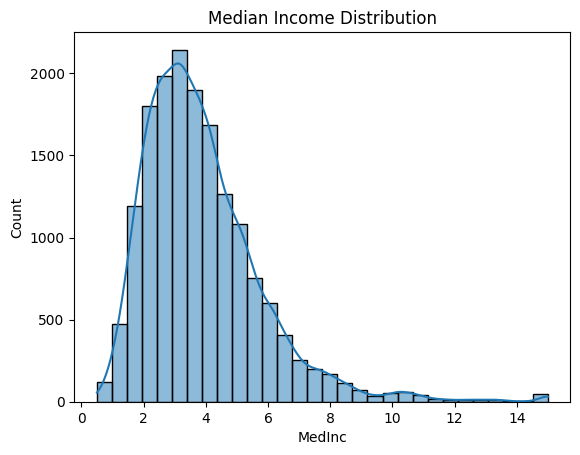

In [45]:
# Visualise one numerical feature distribution
sns.histplot(df_train['MedInc'], bins=30, kde=True)
plt.title("Median Income Distribution")
plt.show()

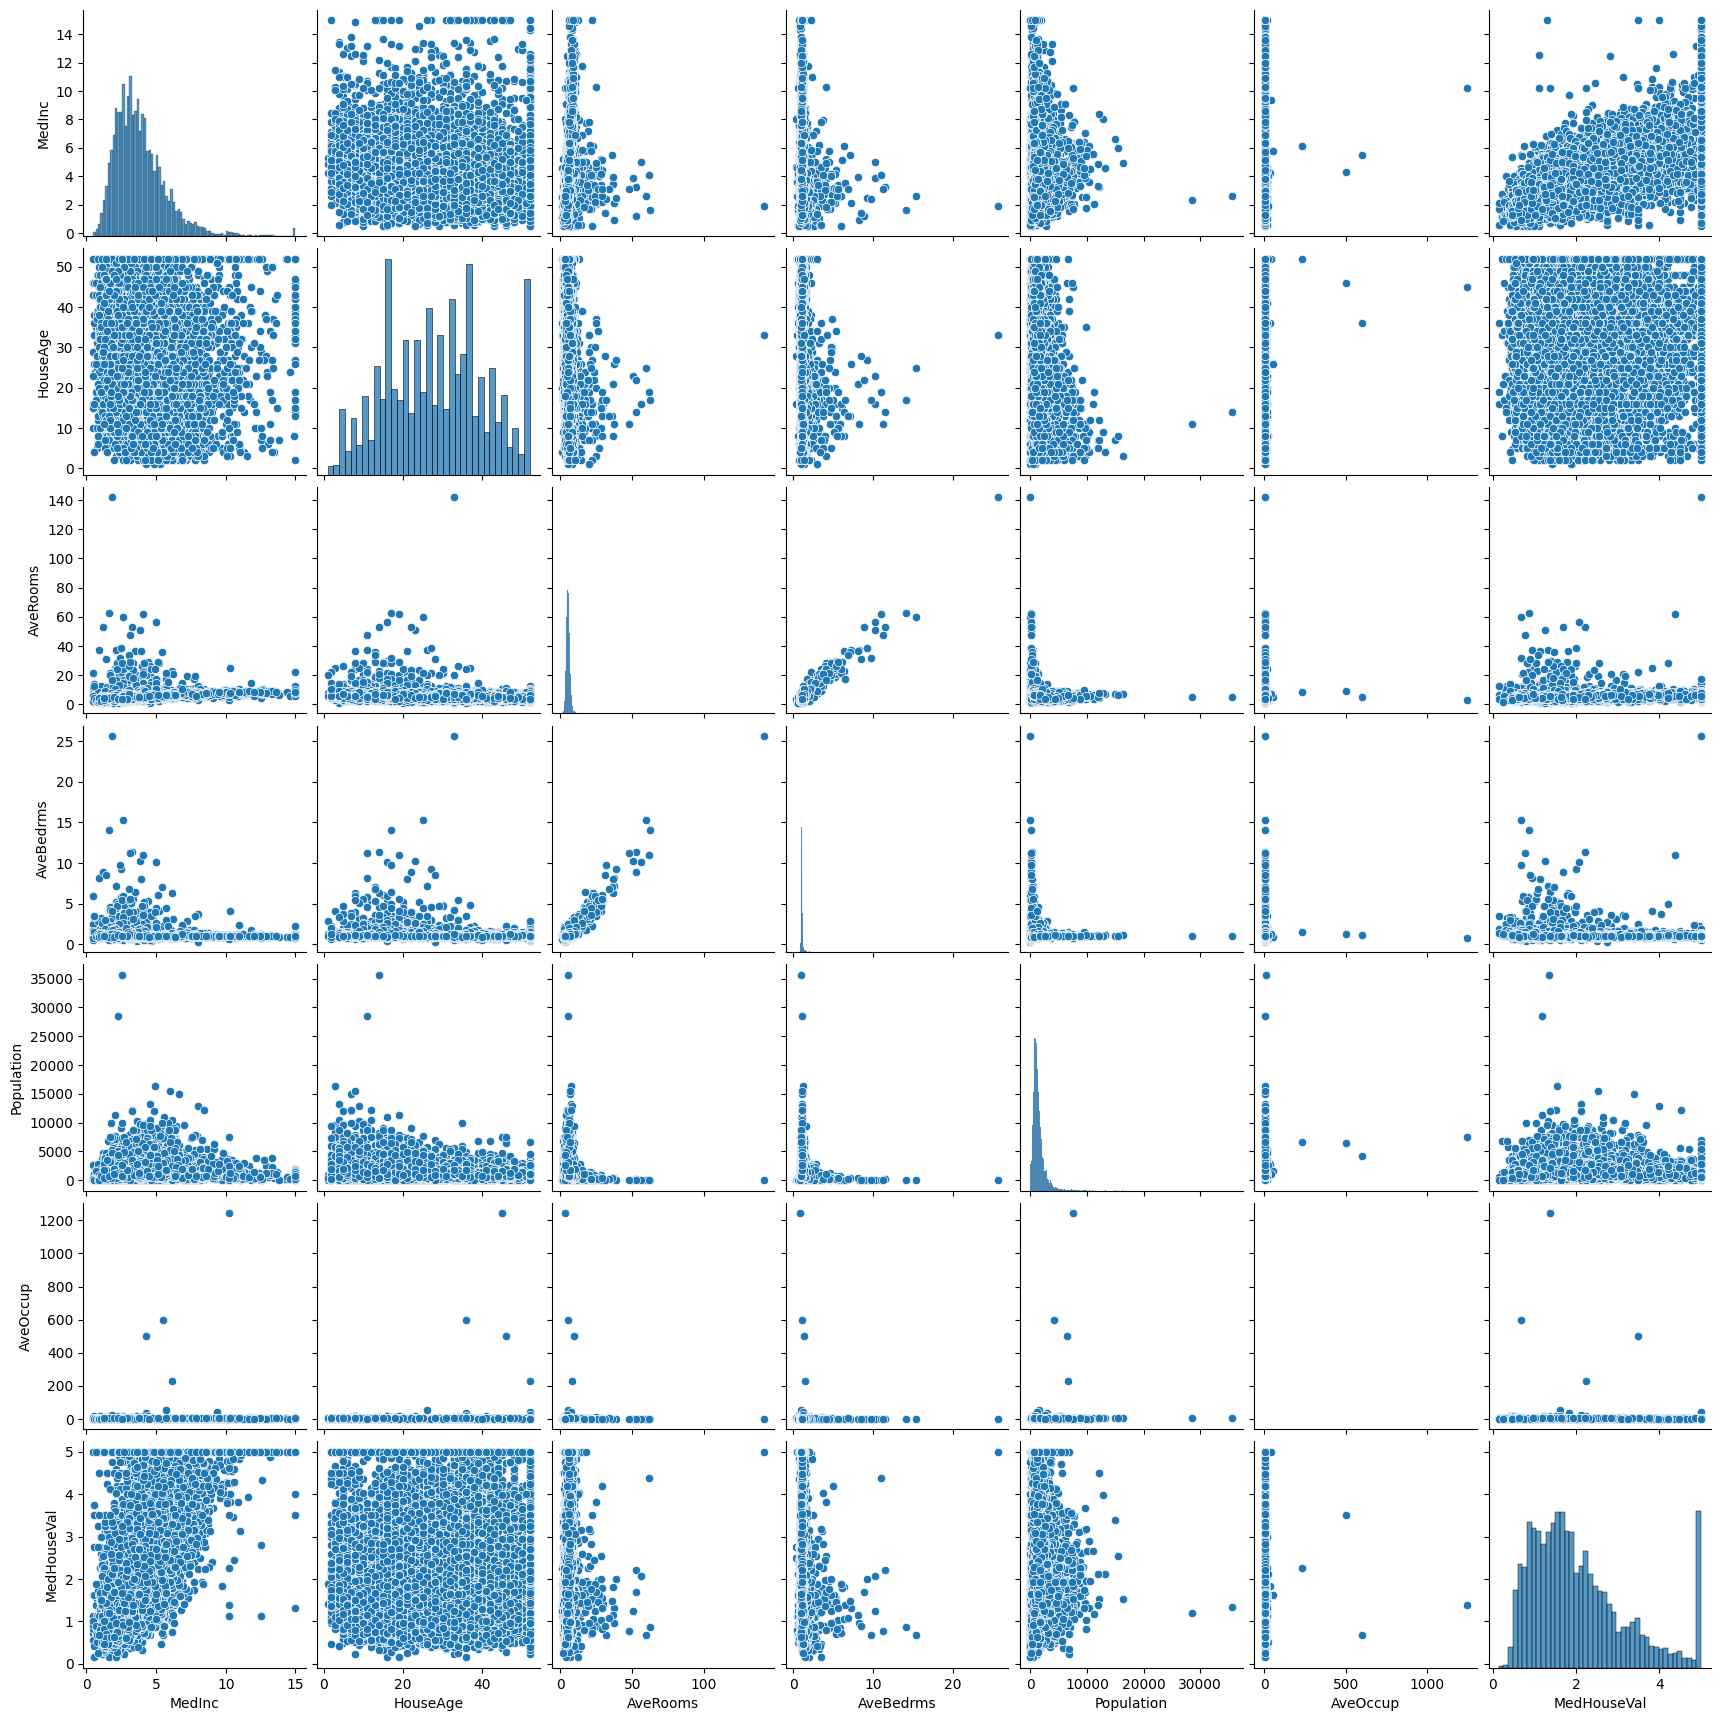

In [46]:
# Plot a pairwise scatter matrix
sns.pairplot(df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']])
plt.show()

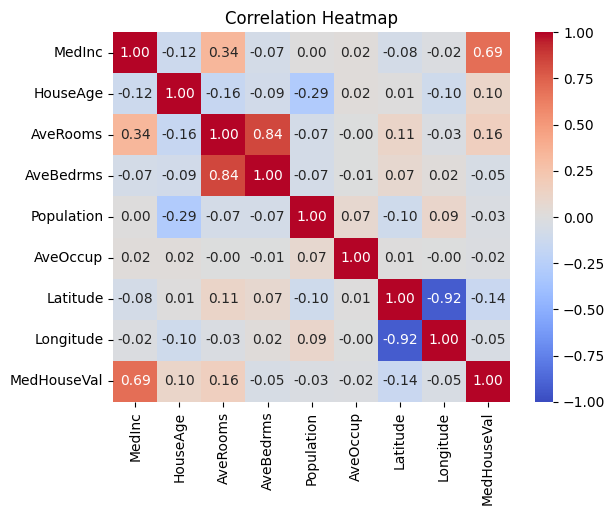

In [47]:
# Plot a correlation heatmap
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 1.4¬†¬†Pre‚Äëprocessing pipeline
Build a `scikit‚Äëlearn` pipeline that (optionally) scales features with `StandardScaler` and fits a **LinearRegression** model as a baseline.

In [20]:
# ----- TODO: build and fit the baseline pipeline ----- #

# Build and fit the baseline pipeline
baseline_pipeline = make_pipeline(StandardScaler(), LinearRegression())
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### 1.5¬†¬†Evaluate the baseline
Compute **RMSE** and **MAE** on the test set.

In [25]:
# ----- TODO: evaluate baseline ----- #

# Evaluate the baseline pipeline
y_pred = baseline_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Baseline RMSE: {rmse:.2f}")
print(f"Baseline MAE: {mae:.2f}")

Baseline RMSE: 0.75
Baseline MAE: 0.53


### 1.6¬†¬†Decision‚ÄëTree Regressor
- Fit a `DecisionTreeRegressor`
- Evaluate the metrics again
- Compare to baseline

In [24]:
# ----- TODO: Decision‚ÄëTree experiment ----- #

# Fit a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Evaluate the metrics again
y_pred = tree_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree MAE: {mae:.2f}")

Decision Tree RMSE: 0.71
Decision Tree MAE: 0.46


### 1.7¬†¬†Hyper‚Äëparameter tuning (Grid¬†Search)
Tune `max_depth` and `min_samples_leaf` using **`GridSearchCV`** with 5‚Äëfold CV.

In [99]:
# ----- TODO: Grid search for Decision-Tree Regressor ----- #

param_grid = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 4]
}

# Ê±∫ÂÆöÊú®„É¢„Éá„É´„ÇíÂÆöÁæ©
tree_reg = DecisionTreeRegressor(random_state=42)

# GridSearchCV „Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆ‰ΩúÊàêÔºàcv=5Ôºâ
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Â≠¶Áøí„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÉÅ„É•„Éº„Éã„É≥„Ç∞
grid_search.fit(X_train, y_train)

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíË°®Á§∫
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4}
Best cross-validation score: 0.23207948991273813


In [102]:
# Fit a DecisionTreeRegressor
tree_reg_optimized = DecisionTreeRegressor(
    random_state=42,
    max_depth=grid_search.best_params_["max_depth"],
    min_samples_leaf=grid_search.best_params_["min_samples_leaf"]
)
tree_reg_optimized.fit(X_train, y_train)

# Evaluate the metrics again
y_pred = tree_reg_optimized.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree MAE: {mae:.2f}")

Decision Tree RMSE: 0.21
Decision Tree MAE: 0.05


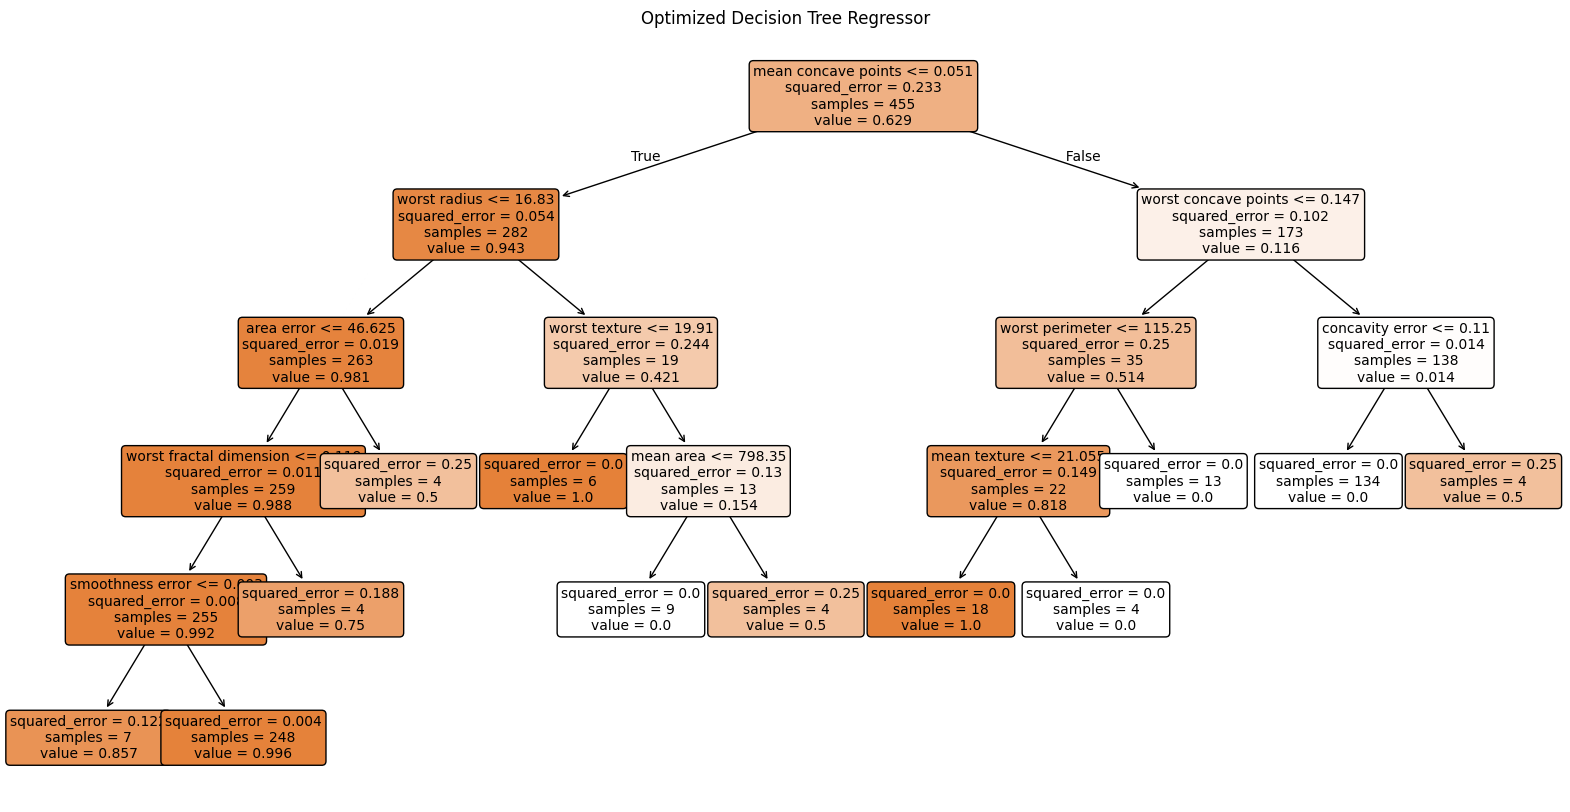

In [105]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    tree_reg_optimized,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Optimized Decision Tree Regressor")
plt.show()

## 2.¬†¬†Classification¬†‚Äì Breast‚ÄëCancer

**Dataset**  

Key Characteristics:

- Target

    - 0 = Malignant (cancerous)

    - 1 = Benign (non-cancerous)

- Features (30 total):

    All features are numeric, derived from digitized images of breast fine needle aspirates (FNAs). Each feature describes characteristics of the cell nuclei:

    There are 10 basic measurements (e.g., radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension), and for each, 3 statistics are recorded:

    - .mean ‚Äì average value

    - .se ‚Äì standard error

    - .worst ‚Äì mean of the three worst (largest) values

    Examples:

        radius_mean, texture_se, area_worst, etc.


**Hands-on Workout** 

Repeat a similar workflow for a binary classification problem.

### 2.1¬†¬†Load the dataset

In [65]:
# ----- TODO: load breast‚Äëcancer dataset into DataFrame `df_clf` ----- #

# Load the Dataset
data = load_breast_cancer(as_frame=True)
df_clf = data.frame
display(df_clf.head())

# Set labels
LABELS = {0: "Malignant", 1: "Benign"}

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

### 2.2¬†¬†Train/test split
- Create `X_train`, `X_test`, `y_train`, `y_test` using an 80/20 split.
- Create `df_train` by concatenating `X_train` and `y_train`

In [48]:
# ----- TODO: split the data ----- #

# Split the data into training and testing sets
X = df_clf.drop('target', axis=1)
y = df_clf['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training features set size: {X_train.shape}")
print(f"Testing features set size: {X_test.shape}")
print(f"Training target set size: {y_train.shape}")
print(f"Testing target set size: {y_test.shape}")

Training features set size: (455, 30)
Testing features set size: (114, 30)
Training target set size: (455,)
Testing target set size: (114,)


In [49]:
# ----- TODO: create df_train ----- #

# Create Train DataFrame
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
68                  0.08046  ...          22.65            65.50       324.7   
181                 0.07398  ...          33.48           176.50      2089.0   
63                  0.06963  ...          19.23            65.59       310.1   
248                 0.06329  ...          35.19            77.98       455.7   
60                  0.06960  ...          17.45            69.86       368.6   

     worst smoothness  worst compactness  worst concavity  \
68            0.14820            0.43650          1.25200   
181           0.14910            0.75840          0.67800   
63            0.09836            0.16780          0.13970   
248           0.14990            0.13980          0.11250   
60            0.12750            0.09866          0.02168   

     worst concave points  worst symmetry  worst fractal dimension  target  
68                0.17500          0.4228                  0.11750       1  
181               0.29030          0.4098                  0.12840       0  
63                0.05087          0.3282                  0.08490       1  
248               0.06136          0.3409                  0.08147       1  
60                0.02579          0.3557                  0.08020       1  

[5 rows x 31 columns]

### 2.3¬†¬†EDA for classification data
- Visualize target class distribution
- Plot a correlation heat-map

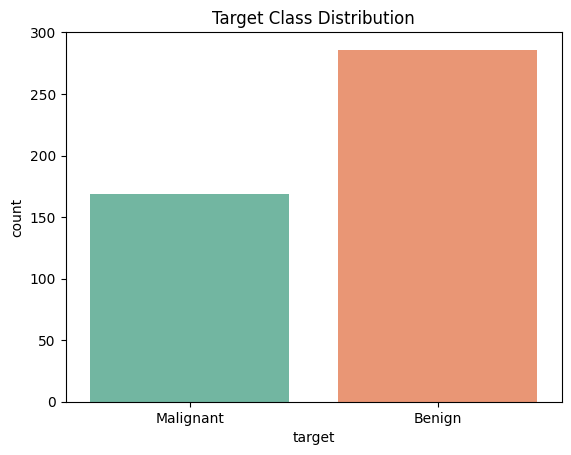

In [83]:
# ----- TODO: your EDA code ----- #

# Visualize target class distribution
sns.countplot(x='target', data=df_train, palette='Set2', hue='target', legend=False)
plt.title("Target Class Distribution")
plt.xticks(ticks=[0, 1], labels=LABELS.values())
plt.show()

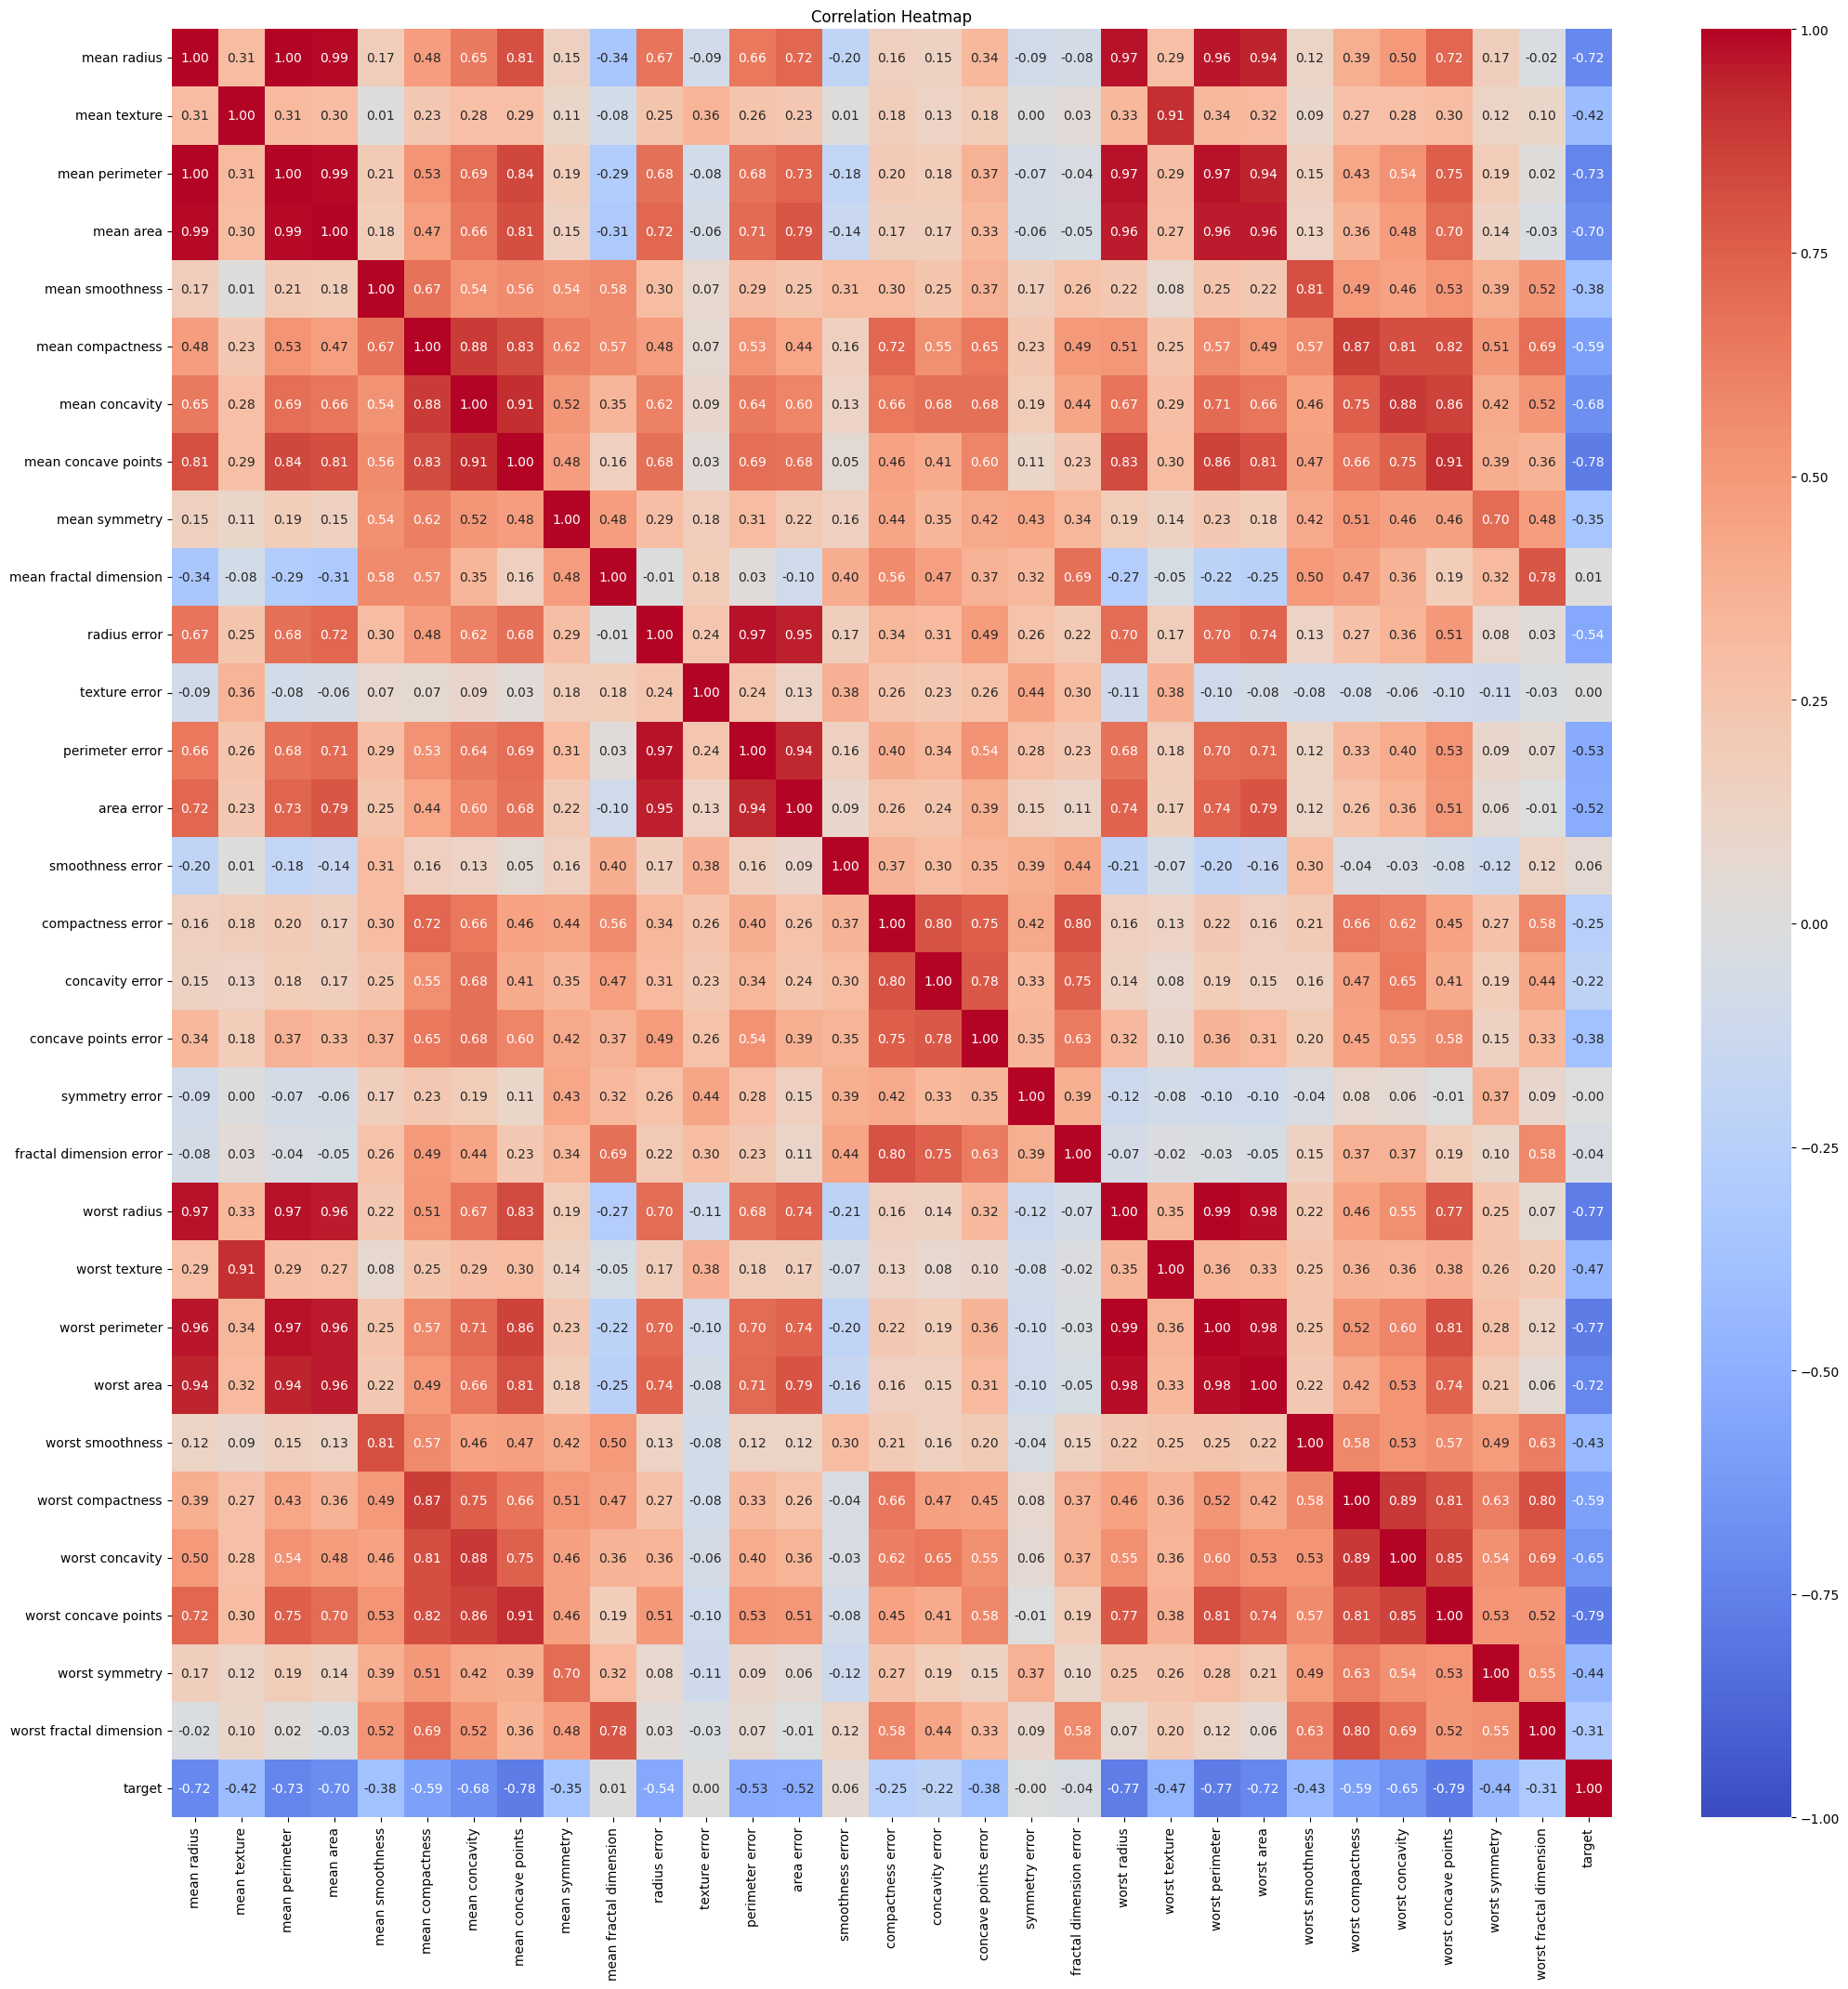

In [59]:
# Plot a correlation heat-map
plt.figure(figsize=(25, 25))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 2.4¬†¬†Pre‚Äëprocessing pipeline
Use `StandardScaler` and **LogisticRegression** as a baseline.

In [61]:
# ----- TODO: pipeline with logistic regression ----- #

# Build and fit the baseline pipeline
baseline_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### 2.5¬†¬†Evaluate baseline
Produce **confusion‚Äëmatrix**, **accuracy**, and **precision/recall** scores.

In [69]:
# Ê∑∑ÂêåË°åÂàó„Çí„Éó„É≠„ÉÉ„Éà„Åô„ÇãÈñ¢Êï∞
def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, labels: list, title: str, 
                            ax: matplotlib.axes.Axes) -> None:
    """
    Ê∑∑ÂêåË°åÂàó„Çí„Éó„É≠„ÉÉ„Éà

    Args:
        y_true (np.ndarray): Ê≠£Ëß£„ÅÆ„ÇØ„É©„Çπ„É©„Éô„É´
        y_pred (np.ndarray): ‰∫àÊ∏¨„Åï„Çå„Åü„ÇØ„É©„Çπ„É©„Éô„É´
        title (str): „Éó„É≠„ÉÉ„Éà„ÅÆ„Çø„Ç§„Éà„É´
        ax (matplotlib.axes.Axes): „Éó„É≠„ÉÉ„Éà„ÇíÊèèÁîª„Åô„ÇãÂØæË±°„ÅÆ Axes
    """
    conf_mat = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
Confusion Matrix:


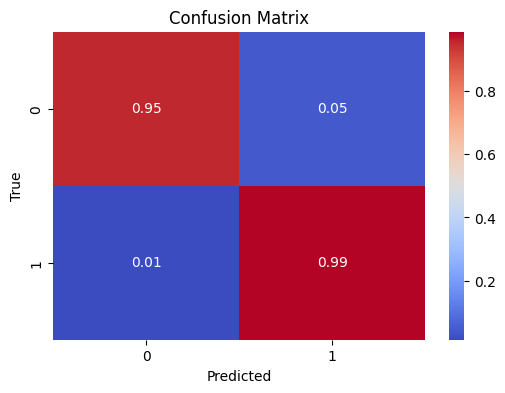

In [74]:
# ----- TODO: evaluation code ----- #

# Evaluate the baseline pipeline
y_pred = baseline_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print(f"Confusion Matrix:")
fig, ax = plt.subplots(figsize=(6, 4))
plot_confusion_matrix(y_test, y_pred, LABELS, "Confusion Matrix", ax)

### 2.6¬†¬†Random‚ÄëForest Classifier experiment

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
Confusion Matrix:


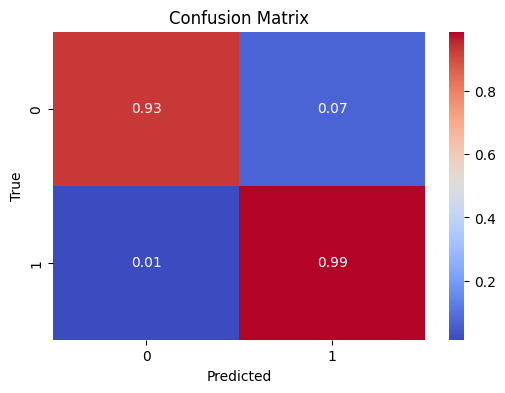

In [76]:
# ----- TODO: RandomForest pipeline & evaluation ----- #

# Build and fit the RandomForest pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
rf_pipeline.fit(X_train, y_train)

# Evaluate the RandomForest pipeline
y_pred = rf_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

print(f"Confusion Matrix:")
fig, ax = plt.subplots(figsize=(6, 4))
plot_confusion_matrix(y_test, y_pred, LABELS, "Confusion Matrix", ax)

### 2.7¬†¬†Hyper‚Äëparameter tuning (Randomized¬†Search)
Tune `n_estimators`, `max_depth`, and `max_features`.

In [82]:
# ----- TODO: RandomizedSearchCV for RandomForest ----- #

# Build and fit the RandomForest pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Correct parameter grid for auto-named step
param_dist = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None]
}

# Randomized search
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print(f"Best CV Accuracy: {random_search.best_score_:.3f}")

Best Params: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10}
Best CV Accuracy: 0.965


## 3. Clustering & PCA Visualization - Iris
In this block, we will apply k-means clustering to a real dataset, decide the number of clusters, and visualize the results using PCA.

### 3.1 Load the dataset

In [98]:
# ----- TODO: load the iris dataset into a DataFrame `df_iris` ----- #

# Load the Dataset
data = load_iris(as_frame=True)
df_iris = data.frame
display(df_iris.head())

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### 3.2 Preprocessing & Scaling
- Seperate features and target
- Scale the feature values with StandardScaler

In [86]:
# ----- TODO: preprocess the data ----- #

# Seperate features and target
X = df_iris.drop('target', axis=1)
y_true = df_iris['target']

# Scale the feature values with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.3 Silhouette Score - Evaluating cluster quality
- Compute the silhouette score for k = 2 to 10
- Visualize scores and determine the best k

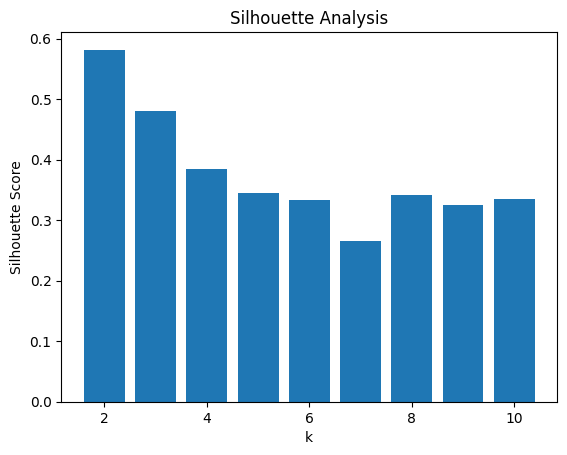

Best k by silhouette: 2


In [89]:
# ----- TODO: silhouette score ----- #

# Compute the silhouette score for k = 2 to 10
sil_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    sil = silhouette_score(X_scaled, km.labels_)
    sil_scores.append(sil)

plt.bar(range(2, 11), sil_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

best_k = 2 + np.argmax(sil_scores)
print("Best k by silhouette:", best_k)

### 3.4 Train k-means and visualize clusters with PCA
- Train k-means with the selected k
- Use PCA to project data to 2D
- Plot the clustered points 

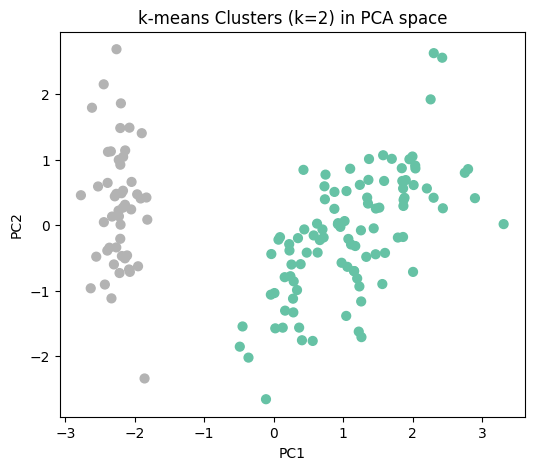

In [95]:
# ----- TODO: train k-means and visualize clusters with PCA ----- #

# Train k-means with the selected k
k = best_k
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X_scaled)

# Use PCA to project data to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_pca = np.asarray(X_pca)

# Plot the clustered points
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="Set2", s=40)
plt.title(f"k-means Clusters (k={k}) in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 3.5 Compare with ground-truth labels
- Create a crosstab of predicted clusters vs. true species
- Visualize the correspondence using a heatmap

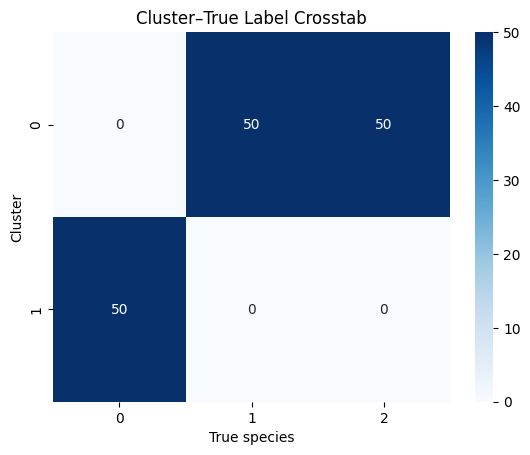

In [96]:
# ----- TODO: compare with ground-truth labels ----- #

# Create a crosstab of predicted clusters vs. true species
ct = pd.crosstab(cluster_labels, y_true, rownames=["Cluster"], colnames=["True species"])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster‚ÄìTrue Label Crosstab")
plt.show()

---

### üéâ¬†Congratulations ‚Äî you‚Äôve completed the exercises!
If you still have time:
- experiment with another dataset of your choice
- swap models (e.g., try `GradientBoostingRegressor` / `LGBMClassifier`)
- create feature‚Äëimportance plots and interpret them

*Happy coding!*